# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

### Observed Trends

-There appears to be a correlation between latitude and temperature (F). Temperature increases as the latitude gets closer to the equator (latitude=0). There appears to be colder datapoints in the Norhtern Hemisphere at latitudes 60 or greater than in the Southern Hemisphere at latitudes of -40 or less.

-There does not appear to be a strong correlation between Humidity and Latitude. However, there seems to be concentration of high humidity (>=60 Humidity) on and near the equator (latitude=0). The same can be said for the south and north pole for different reasons. High humidity is found in the poles because cold air holds less moisture than warm air, causing the air to become satured with less amounts of water.

-There appears to be little to no correlation between latitude and cloudiness(scaled 0 to 100) in both hemispheres.

-There appears to be little to no correlation between Wind Speed (mph) and Latitude in both hemispheres. High and low wind speeds are found in all latitudes.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial"
query_url = url + "&APPID=" + weather_api_key + "&q="
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city.replace(" ","+")
    
    #print(city_url)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        #print(city_weather)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City '" + city + " ' not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tobi village
City 'tobi village ' not found. Skipping...
Processing Record 2 of Set 1 | vilyuchinsk
Processing Record 3 of Set 1 | fort bragg
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | edinburgh of the seven seas
Processing Record 6 of Set 1 | bhabhra
Processing Record 7 of Set 1 | hammerfest
Processing Record 8 of Set 1 | tiksi
Processing Record 9 of Set 1 | colonia
Processing Record 10 of Set 1 | constantia
Processing Record 11 of Set 1 | wenshan city
City 'wenshan city ' not found. Skipping...
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | palmer
Processing Record 14 of Set 1 | college
Processing Record 15 of Set 1 | bangaon
Processing Record 16 of Set 1 | barah
Processing Record 17 of Set 1 | utrik
Processing Record 18 of Set 1 | walvis bay
Processing Record 19 of Set 1 | kishanpur
Processing Record 20 of Set 1 | weno
Processing Record 21 of 

City 'yagry ' not found. Skipping...
Processing Record 31 of Set 4 | wellington
Processing Record 32 of Set 4 | bredasdorp
Processing Record 33 of Set 4 | kyren
Processing Record 34 of Set 4 | wailua homesteads
Processing Record 35 of Set 4 | conceicao da barra
Processing Record 36 of Set 4 | tranovaho
City 'tranovaho ' not found. Skipping...
Processing Record 37 of Set 4 | dolbeau-mistassini
Processing Record 38 of Set 4 | sorong
Processing Record 39 of Set 4 | corinth
Processing Record 40 of Set 4 | kansk
Processing Record 41 of Set 4 | luderitz
Processing Record 42 of Set 4 | paya
Processing Record 43 of Set 4 | prado
Processing Record 44 of Set 4 | papatowai
Processing Record 45 of Set 4 | general conesa
Processing Record 46 of Set 4 | broken hill
Processing Record 47 of Set 4 | chonchi
Processing Record 48 of Set 4 | lebu
Processing Record 49 of Set 4 | mirny
Processing Record 0 of Set 5 | lazaro cardenas
Processing Record 1 of Set 5 | sassandra
Processing Record 2 of Set 5 | bich

Processing Record 20 of Set 8 | ulsteinvik
Processing Record 21 of Set 8 | shangrao
Processing Record 22 of Set 8 | noosa heads
Processing Record 23 of Set 8 | theniet el had
Processing Record 24 of Set 8 | kokstad
Processing Record 25 of Set 8 | sabang
Processing Record 26 of Set 8 | ceeldheer
Processing Record 27 of Set 8 | kirkuk
Processing Record 28 of Set 8 | port augusta
Processing Record 29 of Set 8 | harlingen
Processing Record 30 of Set 8 | macapa
Processing Record 31 of Set 8 | fetesti
Processing Record 32 of Set 8 | santana
Processing Record 33 of Set 8 | morehead city
Processing Record 34 of Set 8 | kapa'a
Processing Record 35 of Set 8 | salinopolis
Processing Record 36 of Set 8 | noumea
Processing Record 37 of Set 8 | ca mau
Processing Record 38 of Set 8 | lichinga
Processing Record 39 of Set 8 | brasileia
Processing Record 40 of Set 8 | outjo
Processing Record 41 of Set 8 | nabire
Processing Record 42 of Set 8 | alotau
City 'alotau ' not found. Skipping...
Processing Reco

Processing Record 3 of Set 12 | levuka
Processing Record 4 of Set 12 | cookeville
Processing Record 5 of Set 12 | dadonghai
City 'dadonghai ' not found. Skipping...
Processing Record 6 of Set 12 | wakkanai
Processing Record 7 of Set 12 | arar
Processing Record 8 of Set 12 | kurchatov
Processing Record 9 of Set 12 | laurel
Processing Record 10 of Set 12 | verkhnevilyuysk
Processing Record 11 of Set 12 | bissau
Processing Record 12 of Set 12 | quezon
Processing Record 13 of Set 12 | gaspe
Processing Record 14 of Set 12 | nesterov
Processing Record 15 of Set 12 | asau
Processing Record 16 of Set 12 | inhambane
Processing Record 17 of Set 12 | clinton
Processing Record 18 of Set 12 | tubarjal
Processing Record 19 of Set 12 | forster
Processing Record 20 of Set 12 | galle
Processing Record 21 of Set 12 | solnechnyy
Processing Record 22 of Set 12 | wangjing
Processing Record 23 of Set 12 | mahdia
Processing Record 24 of Set 12 | katsuura
Processing Record 25 of Set 12 | nuuk
Processing Recor

### Convert into a Pandas DataFrame

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vilyuchinsk,52.9306,158.4028,32.27,80,100,6.62,RU,1683653798
1,fort bragg,35.1390,-79.0060,88.20,43,75,10.36,US,1683653798
2,bethel,41.3712,-73.4140,70.18,33,0,5.75,US,1683653799
3,edinburgh of the seven seas,-37.0676,-12.3116,57.43,71,63,22.35,SH,1683653799
4,bhabhra,22.5333,74.3333,90.37,16,5,10.89,IN,1683653799


### Convert into a csv

In [17]:
# Export the City_Data into a csv
city_data_df.to_csv("WeatherPy/cities.csv", index_label="City_ID")

In [18]:
# Read saved data
city_data_df = pd.read_csv("WeatherPy/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City.1,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vilyuchinsk,52.9306,158.4028,32.27,80,100,6.62,RU,1683653798
1,fort bragg,35.1390,-79.0060,88.20,43,75,10.36,US,1683653798
2,bethel,41.3712,-73.4140,70.18,33,0,5.75,US,1683653799
3,edinburgh of the seven seas,-37.0676,-12.3116,57.43,71,63,22.35,SH,1683653799
4,bhabhra,22.5333,74.3333,90.37,16,5,10.89,IN,1683653799


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

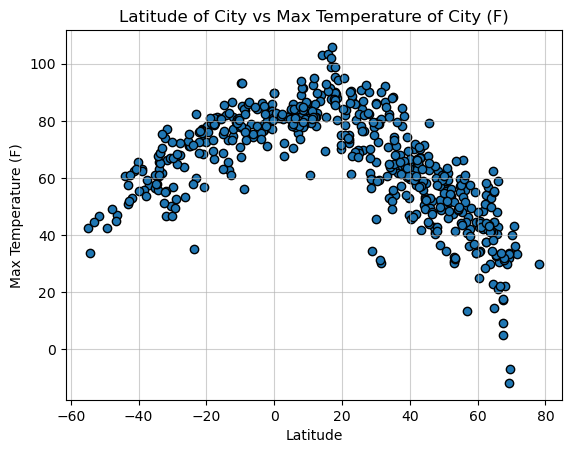

In [83]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],edgecolors="black")

# Incorporate the other graph properties
plt.title("Latitude of City vs Max Temperature of City (F)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(alpha=0.6)


# Save the figure
plt.savefig("WeatherPy/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

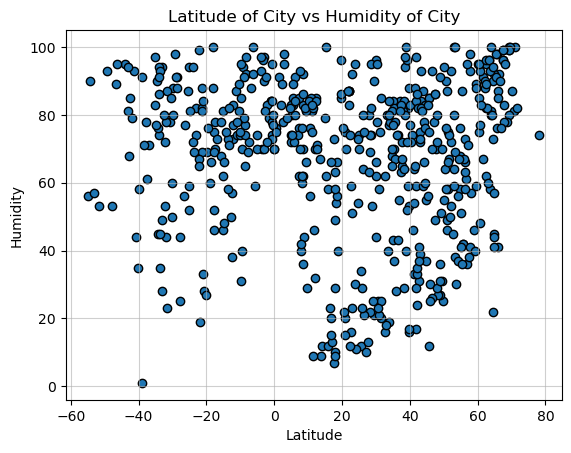

In [82]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],edgecolors="black")
# Incorporate the other graph properties
plt.title("Latitude of City vs Humidity of City")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(alpha=0.6)


# Save the figure
plt.savefig("WeatherPy/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

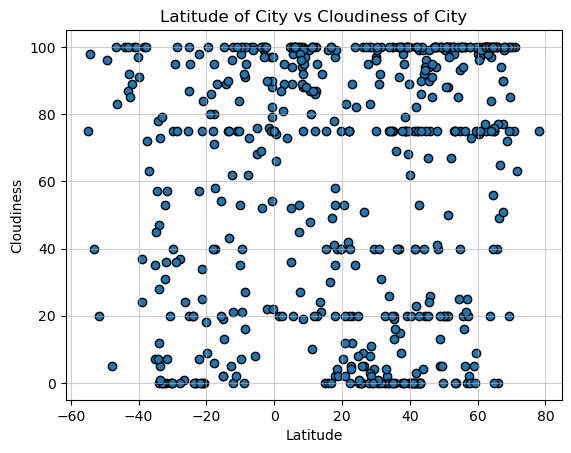

In [84]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],edgecolors="black")

# Incorporate the other graph properties
plt.title("Latitude of City vs Cloudiness of City")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(alpha=0.6)

# Save the figure
plt.savefig("WeatherPy/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

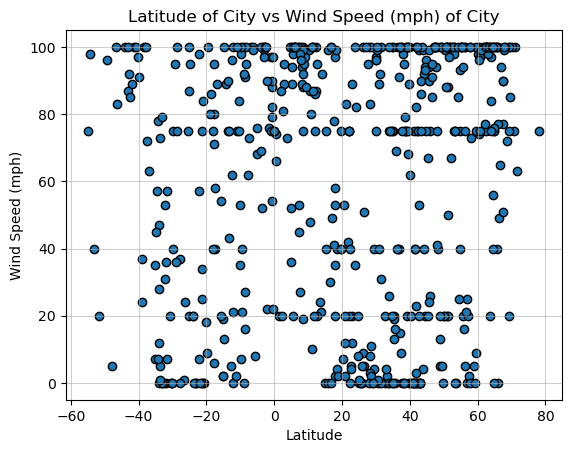

In [85]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],edgecolors="black")

# Incorporate the other graph properties
plt.title("Latitude of City vs Wind Speed (mph) of City")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(alpha=0.6)

# Save the figure
plt.savefig("WeatherPy/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [46]:
# Define a function to create Linear Regression plots
def linear_regression(x_values,yvalues,title,text_coordinates):
    
    (slope, intercept, r_value, p_value, stderr) = linregress(x_values,y_values)
    regression_equation = (x_values * slope) + intercept
    line_equation = "y= " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regression_equation, "r-")
    plt.xlabel("Latitude")
    #plt.ylabel("Title")
    plt.annotate(line_equation,text_coordinates)
    print(f"The r-squared value is:{r_value}")
    plt.show

In [47]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>=0)]

# Display sample data
northern_hemi_df.head()

,City.1,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vilyuchinsk,52.9306,158.4028,32.27,80,100,6.62,RU,1683653798
1,fort bragg,35.1390,-79.0060,88.20,43,75,10.36,US,1683653798
2,bethel,41.3712,-73.4140,70.18,33,0,5.75,US,1683653799
4,bhabhra,22.5333,74.3333,90.37,16,5,10.89,IN,1683653799
5,hammerfest,70.6634,23.6821,43.25,81,75,0.00,NO,1683653800


In [48]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


# Display sample data
southern_hemi_df.head()

,City.1,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,edinburgh of the seven seas,-37.0676,-12.3116,57.43,71,63,22.35,SH,1683653799
9,ushuaia,-54.8000,-68.3000,42.46,56,75,16.11,AR,1683653801
15,walvis bay,-22.9575,14.5053,59.95,82,0,5.75,NaN,1683653803
18,barra de santo antonio,-9.4047,-35.5072,85.28,70,21,8.68,BR,1683653804
23,port-aux-francais,-49.3500,70.2167,42.33,93,96,20.07,TF,1683653805


###  Temperature vs. Latitude Linear Regression Plot

The r-squared value is:-0.8250395969624258


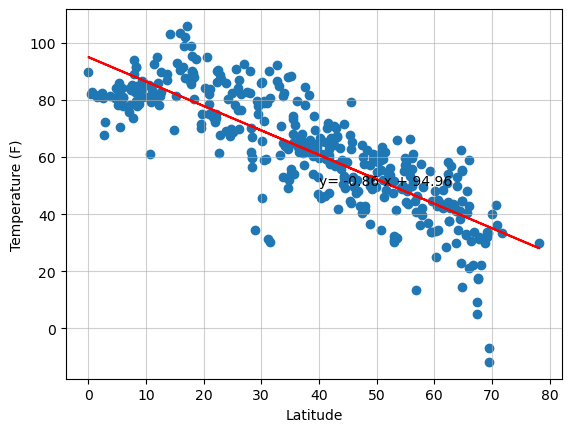

In [86]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plt.ylabel("Temperature (F)")
#plt.annotate(line_equation,text_coordinates)
linear_regression(x_values,y_values, 'Max Temp',(40,50))
#print(regression_equation)
plt.grid(alpha=0.6)
plt.show()

The r-squared value is:0.7894630094271541


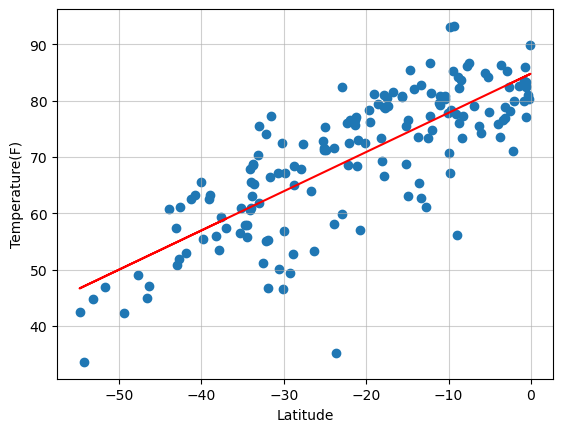

In [94]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plt.ylabel("Temperature(F)")
plt.grid(alpha=0.6)
linear_regression(x_values,y_values, 'Max Temp',(-60,50))

**Discussion about the linear relationship:** 

There appears to be a correlation between latitude and temperature (F). Temperature increases as the latitude gets closer to the equator (latitude=0). There appears to be colder datapoints in the Norhtern Hemisphere at latitudes 60 or greater than in the Southern Hemisphere at latitudes of -40 or less. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared value is:0.1549278023007754


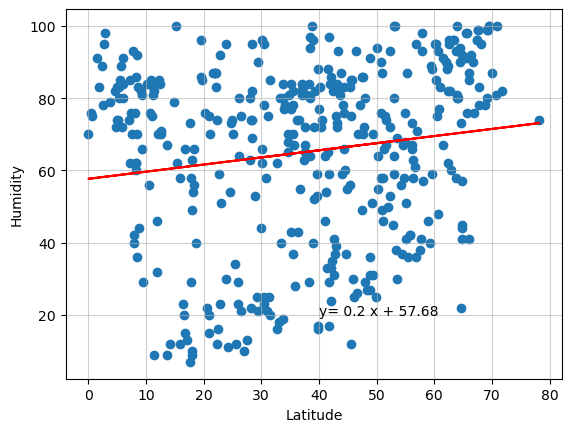

In [88]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plt.ylabel("Humidity")
plt.grid(alpha=0.6)
linear_regression(x_values,y_values, 'Humidity', (40,20))

The r-squared value is:0.1435803657255391


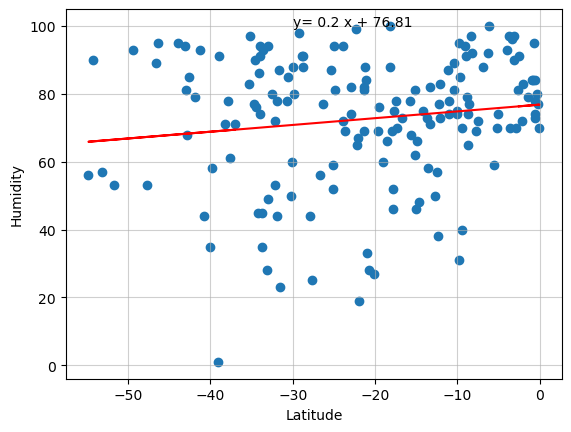

In [89]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plt.ylabel("Humidity")
plt.grid(alpha=0.6)
linear_regression(x_values,y_values, 'Humidity', (-30,100))

**Discussion about the linear relationship:** 

There does not appear to be a strong correlation between Humidity and Latitude. However, there seems to be concentration of high humidity (>=60 Humidity) on and near the equator (latitude=0). The same can be said for the south and north pole for different reasons. High humidity is found in the poles because cold air holds less moisture than warm air, causing the air to become satured with less amounts of water. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared value is:0.10567946654326606


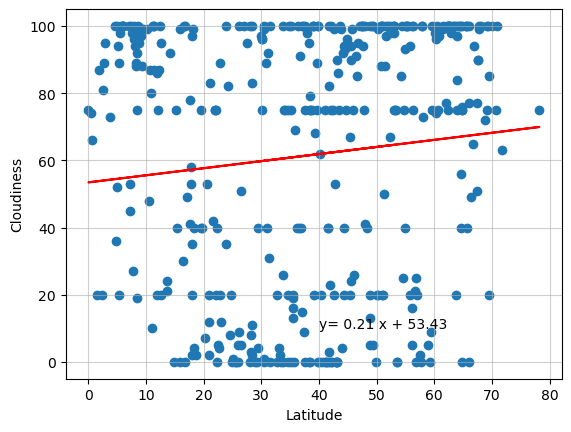

In [90]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plt.ylabel("Cloudiness")
plt.grid(alpha=0.6)
linear_regression(x_values,y_values, 'Cloudiness', (40,10))

The r-squared value is:0.14021121853726407


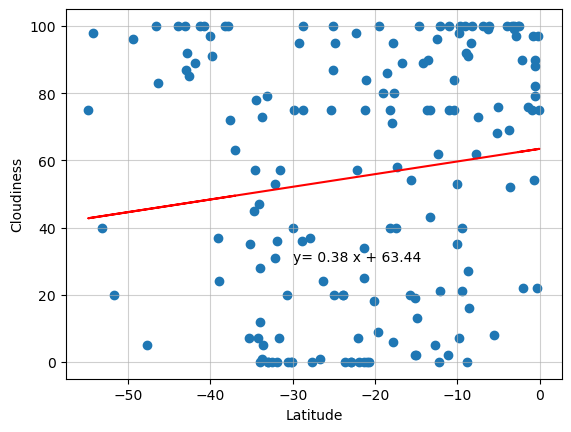

In [91]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plt.ylabel("Cloudiness")
plt.grid(alpha=0.6)
linear_regression(x_values,y_values, 'Cloudiness', (-30,30))

**Discussion about the linear relationship:** 

There appears to be little to no correlation between latitude and cloudiness(scaled 0 to 100) in both hemispheres. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared value is:-0.06578393797874788


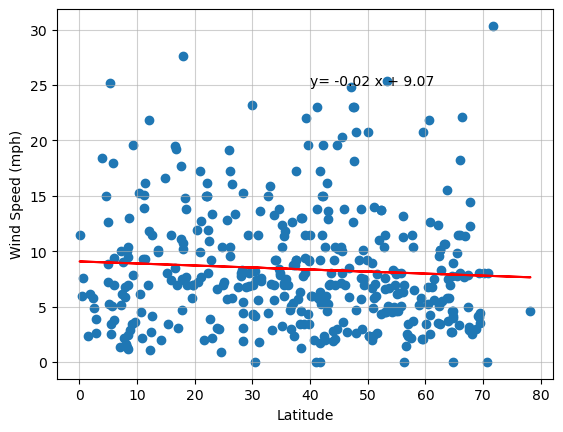

In [92]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Wind Speed"]
plt.ylabel("Wind Speed (mph)")
plt.grid(alpha=0.6)
linear_regression(x_values,y_values, 'Windspeed', (40,25))

The r-squared value is:-0.07285830767673389


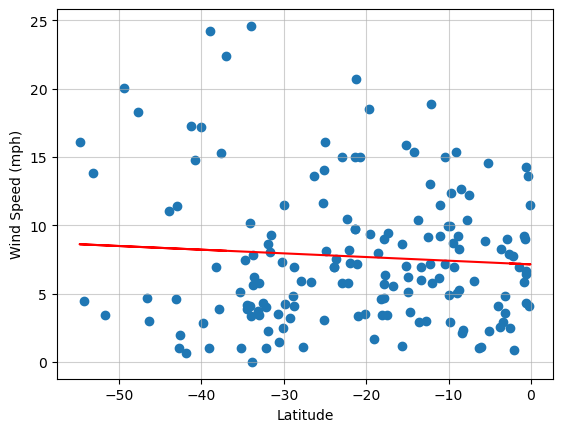

In [93]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]
plt.ylabel("Wind Speed (mph)")
plt.grid(alpha=0.6)
linear_regression(x_values,y_values, 'Windspeed', (-30,100))

### Discussion about the linear relationship 

There appears to be little to no correlation between Wind Speed (mph) and Latitude in both hemispheres. High and low wind speeds are found in all latitudes.